In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"""
# Data Perturbation for Privacy Preservation

## Introduction

Data perturbation is a technique used to anonymize sensitive information by adding noise to original values to protect individual privacy. This method is particularly useful in datasets containing financial or medical information. In this notebook, we will explore this technique by applying noise to fictitious health plan values and analyzing the impact of this perturbation on the data.

## Importing Libraries
"""

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Generating a Simulated Dataset

In [10]:

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate a fictitious dataset
num_samples = 1000
original_values = np.random.uniform(500, 5000, num_samples)

df = pd.DataFrame({
    "id": range(num_samples),
    "plan_value": original_values
})


In [11]:
df

,id,plan_value
0,0,2185.430535
1,1,4778.214379
2,2,3793.972738
3,3,3193.963179
4,4,1202.083882
...,...,...
995,995,912.119330
996,996,4627.911090
997,997,1115.683839
998,998,4776.068092


## Adding Noise to the Data

In [12]:
# Define function to add noise to the data
def perturb_plan_value(value, noise_magnitude):
    threshold = random.random()
    applied_noise = random.random() * noise_magnitude
    
    if threshold > 0.5 and (value - applied_noise) >= 0:
        return round(value - applied_noise, 2)
    return round(value + applied_noise, 2)


## Measuring the Impact of Perturbation

In [16]:
# Function to calculate squared error
def noise_error(original_values, noisy_values):
    original_values = np.array(original_values, dtype=float)
    noisy_values = np.array(noisy_values, dtype=float)
    return np.sum((original_values - noisy_values) ** 2)

# Test different noise magnitudes
noise_magnitudes = [500, 2500, 5000, 7500, 10000]
error_results = []

df_results = []
for noise in noise_magnitudes:
    df["noisy_plan_value"] = df["plan_value"].apply(lambda x: perturb_plan_value(x, noise))
    error = noise_error(df["plan_value"], df["noisy_plan_value"])
    error_results.append([noise, error])

df_results = pd.DataFrame(error_results, columns=["NOISE_MAGNITUDE", "SUM_SQUARED_ERROR"])


In [17]:
df_results

,NOISE_MAGNITUDE,SUM_SQUARED_ERROR
0,500,8.412576e+07
1,2500,2.035366e+09
2,5000,8.546454e+09
3,7500,1.884636e+10
4,10000,3.269588e+10


## Visualizing the Results

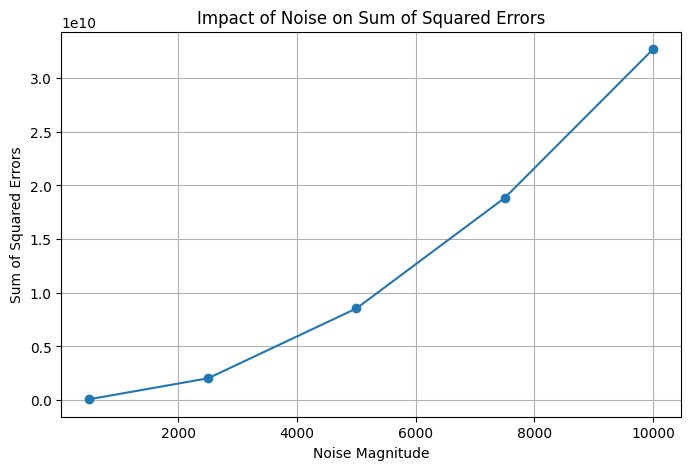

In [18]:

# Create a plot to visualize the relationship between Noise and Squared Error
plt.figure(figsize=(8, 5))
plt.plot(df_results["NOISE_MAGNITUDE"], df_results["SUM_SQUARED_ERROR"], marker='o', linestyle='-')
plt.xlabel("Noise Magnitude")
plt.ylabel("Sum of Squared Errors")
plt.title("Impact of Noise on Sum of Squared Errors")
plt.grid(True)
plt.show()

## Conclusion

In this notebook, we explored data perturbation as a method to preserve privacy. We observed that as the noise magnitude increases, the sum of squared errors also increases, indicating greater distortion in the original data. This technique can be applied in various scenarios to protect sensitive information without significantly compromising statistical analyses.
"""
